In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import math

# Gaussian Smoothing

The Gaussian smoothing operator is a 2-D convolution operator that is used to 'blur' images and remove detail and noise.

## Gaussian Distribution

The Gaussian distribution in 1D has the form:

$$ G(x) = \dfrac{1}{\sqrt{2\pi\sigma}}e^{-\dfrac{x^2}{2\sigma^2}} $$

We can define this in Python as:

In [21]:
def G(x, sigma=1):
    return 1 / math.sqrt(2*math.pi*sigma) * math.exp(-x**2 / (2*sigma**2))

At the value $G(0)$ the function returns the highest value.

In [22]:
G(0)

0.3989422804014327

And if we plot the function, it is the bell curve.

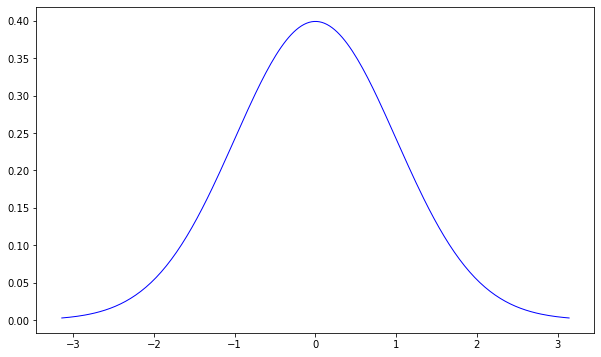

In [35]:
X = np.linspace(-math.pi, math.pi, 200)
y = [G(x) for x in X]
plt.figure(figsize=(10,6))
plot(X, y, lw=1, c='b')

Another known fact is that the area under this curve, that is

$$
\int_{-\infty}^{\infty} \dfrac{1}{\sqrt{2\pi\sigma}}e^{-\dfrac{x^2}{2\sigma^2}} = 1
$$

is a total area of $1$. Approximately integrating this in Python will demonstrate this:

In [47]:
def integrate(f, a, b, step_size):
    X = np.linspace(a, b, (b - a) / step_size)
    y = [f(x)*step_size for x in X]
    return sum(y)

In [49]:
integrate(G, -10, 10, 0.01)

0.9995000000000002

With this we can calculate the 1D convolution kernel:

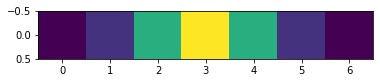

In [65]:
gaussian_kernel_1d = [integrate(G, i - 1 + 0.5, i + 0.5, step_size=0.01) for i in range(-3, 3 + 1)]
plt.imshow([gaussian_kernel_1d])

In 2D, the Gaussian has the form

$$
G(x, y) = \dfrac{1}{2\pi\sigma}e^{-\dfrac{x^2 + y^2}{2\sigma^2}}
$$

In [71]:
def G2(x, y, sigma=1):
    return 1 / (2*math.pi*sigma) * math.exp(-(x*x + y*y) / (2*sigma**2))

To generate the kernel, we integrate $G$ over the region $R$, which is a single pixel.

$$
\iint_R \dfrac{1}{2\pi\sigma}e^{-\dfrac{x^2 + y^2}{2\sigma^2}}
$$



In [145]:
def integrate2(f, x1, y1, x2, y2, step_size):
    X = np.linspace(x1, x2, abs((x2 - x1) / step_size))
    Y = np.linspace(y1, y2, abs((y2 - y1) / step_size))
    y = [f(x, y) * step_size**2 for y in Y for x in X]
    return sum(y)

In [146]:
integrate2(G2, 0, 0, 2, 2, 0.01)

0.22765053729565765

In [183]:
G2(0, 0)

0.15915494309189535

In [190]:
def gaussian_kernel(n, sigma):
    K = []
    G = []
    if not n & 1:
        raise Exception('n must be odd.')
    for x in range(-n//2 + 1, n//2 + 1):
        for y in range(-n//2 + 1, n//2 + 1):
            K.append(integrate2(G2, x-1, x, y-1, y, 0.01))
            G.append([x, y])
    return np.array(K).reshape((n, n)), G

In [191]:
gaussian_kernel_2d, G = gaussian_kernel(5, 1)
gaussian_kernel_2d

array([[0.        , 0.00292174, 0.07526816, 0.40785792, 0.79939352],
       [0.00292174, 0.        , 0.04640341, 0.32525377, 0.66804933],
       [0.07526816, 0.04640341, 0.        , 0.11637229, 0.32525377],
       [0.40785792, 0.32525377, 0.11637229, 0.        , 0.04640341],
       [0.79939352, 0.66804933, 0.32525377, 0.04640341, 0.        ]])

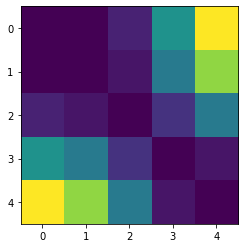

In [192]:
imshow(gaussian_kernel_2d)

In [195]:
G = np.array(G).reshape((5,5, 2))